In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 
from utils import my_histogram

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_team = pd.read_csv("../data/df_team.csv")


In [5]:
df_team

,team_api_id,team_long_name,league_name,team_measured_date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,FC Aarau,Switzerland Super League,2010-02-22,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,FC Aarau,Switzerland Super League,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,FC Aarau,Switzerland Super League,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,Aberdeen,Scotland Premier League,2010-02-22,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,Aberdeen,Scotland Premier League,2011-02-22,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,SV Zulte-Waregem,Belgium Jupiler League,2011-02-22,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,10000,SV Zulte-Waregem,Belgium Jupiler League,2012-02-22,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,10000,SV Zulte-Waregem,Belgium Jupiler League,2013-09-20,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,10000,SV Zulte-Waregem,Belgium Jupiler League,2014-09-19,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [7]:
team_num_attr = ["team_api_id", "team_measured_date", "buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing", 
                 "chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting", "defencePressure", "defenceAggression",
                 "defenceTeamWidth"]

In [8]:
df_team_num_attr = df_team[team_num_attr]

In [9]:
df_team_num_attr

,team_api_id,team_measured_date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,9930,2010-02-22,60,NaN,50,60,65,55,50,55,45
1,9930,2014-09-19,52,48.0,56,54,63,64,47,44,54
2,9930,2015-09-10,47,41.0,54,54,63,64,47,44,54
3,8485,2010-02-22,70,NaN,70,70,70,70,60,70,70
4,8485,2011-02-22,47,NaN,52,53,48,52,47,47,52
...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,2011-02-22,52,NaN,52,52,48,53,46,48,53
1454,10000,2012-02-22,54,NaN,51,47,52,50,44,55,53
1455,10000,2013-09-20,54,NaN,51,47,52,32,44,58,37
1456,10000,2014-09-19,54,42.0,51,47,52,32,44,58,37


In [12]:
df_team_num_attr.isna().sum()

team_api_id                 0
team_measured_date          0
buildUpPlaySpeed            0
buildUpPlayDribbling      969
buildUpPlayPassing          0
chanceCreationPassing       0
chanceCreationCrossing      0
chanceCreationShooting      0
defencePressure             0
defenceAggression           0
defenceTeamWidth            0
dtype: int64

- Since there are missing values in only the buildUpPlayDribbling column, let's just drop the column.

In [13]:
df_team_num_attr.drop("buildUpPlayDribbling", axis = 1, inplace = True)

- Since there are only 2 teams in each match, there will be total 2 teams x 10 team attributes = 20 columns for each match.
- So the original team attributes columns will be used for modeling unlike the player attribute columns that will be used after dimensionality reduction by PCA. 

In [15]:
team_num_collected = pd.DataFrame(df_team_num_attr.groupby("team_api_id").count().team_measured_date)
team_num_collected.columns = ["num_collected"]
team_num_collected

,num_collected
team_api_id,
1601,6
1773,3
1957,6
2033,5
2182,6
...,...
10281,6
108893,6
158085,2


In [16]:
team_num_collected.describe()

,num_collected
count,288.000000
mean,5.062500
std,1.540255
min,1.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,6.000000


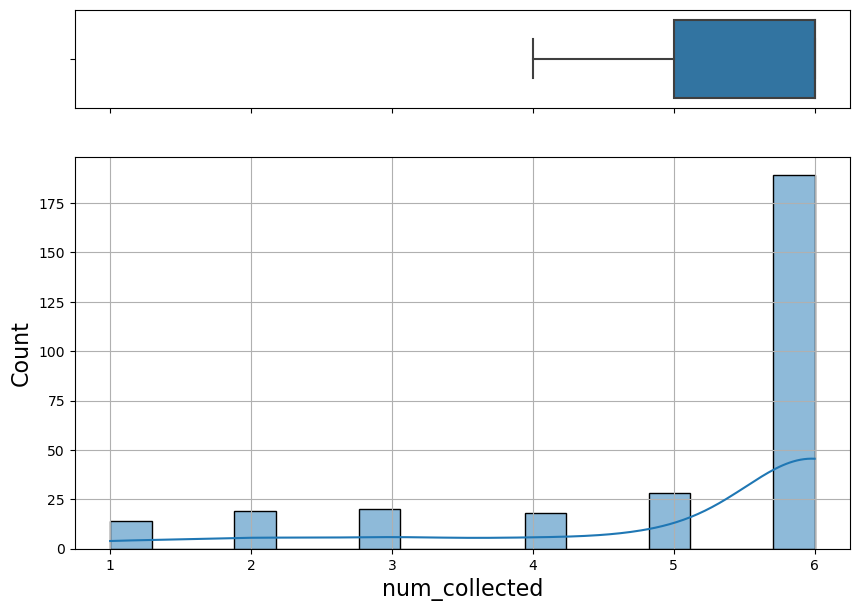

In [17]:
my_histogram(team_num_collected, "num_collected")

- For most teams, team attributes were collected 5 to 6 times.
- So, we will use team attributes collected closest to match dates.

In [18]:
df_match_basic = pd.read_csv("../data/df_match_basic.csv")

In [25]:
df_match_team_num_attr = df_match_basic[["match_api_id", "match_date", "home_team_api_id", "away_team_api_id"]]

In [42]:
home_team_info = df_match_team_num_attr.merge(df_team_num_attr, how = "left", left_on = "home_team_api_id", right_on = "team_api_id") \
                                       .sort_values(["team_api_id", "match_date", "team_measured_date"])

In [43]:
home_team_info["date_diff"] = (pd.to_datetime(home_team_info.team_measured_date) - pd.to_datetime(home_team_info.match_date)).dt.days
home_team_info = home_team_info[home_team_info.date_diff < 0]

In [44]:
home_team_info = home_team_info.sort_values(["team_api_id", "match_date", "date_diff"], ascending = [True, True, False]).groupby(["team_api_id", "match_date"]).first()

In [48]:
home_team_info = home_team_info.drop(["home_team_api_id", "away_team_api_id", "team_measured_date", "date_diff"], axis = 1) \
                    .rename(columns = {"buildUpPlaySpeed": "home_team_buildUpPlaySpeed", "buildUpPlayPassing": "home_team_buildUpPlayPassing",
                                       "chanceCreationPassing": "home_team_chanceCreationPassing", "chanceCreationCrossing": "home_team_chanceCreationCrossing",
                                       "chanceCreationShooting": "home_team_chanceCreationShooting", "defencePressure": "home_team_defencePressure", 
                                       "defenceAggression": "home_team_defenceAggression", "defenceTeamWidth": "home_team_defenceTeamWidth"})

In [49]:
away_team_info = df_match_team_num_attr.merge(df_team_num_attr, how = "left", left_on = "away_team_api_id", right_on = "team_api_id") \
                                       .sort_values(["team_api_id", "match_date", "team_measured_date"])

In [50]:
away_team_info["date_diff"] = (pd.to_datetime(away_team_info.team_measured_date) - pd.to_datetime(away_team_info.match_date)).dt.days
away_team_info = away_team_info[away_team_info.date_diff < 0]

In [51]:
away_team_info = away_team_info.sort_values(["team_api_id", "match_date", "date_diff"], ascending = [True, True, False]).groupby(["team_api_id", "match_date"]).first()

In [52]:
away_team_info = away_team_info.drop(["home_team_api_id", "away_team_api_id", "team_measured_date", "date_diff"], axis = 1) \
                    .rename(columns = {"buildUpPlaySpeed": "away_team_buildUpPlaySpeed", "buildUpPlayPassing": "away_team_buildUpPlayPassing",
                                       "chanceCreationPassing": "away_team_chanceCreationPassing", "chanceCreationCrossing": "away_team_chanceCreationCrossing",
                                       "chanceCreationShooting": "away_team_chanceCreationShooting", "defencePressure": "away_team_defencePressure", 
                                       "defenceAggression": "away_team_defenceAggression", "defenceTeamWidth": "away_team_defenceTeamWidth"})

In [55]:
home_team_info

match_api_id  home_team_buildUpPlaySpeed  \
team_api_id match_date                                             
1601.0      2010-03-06        674613                        30.0   
            2010-03-19        674631                        30.0   
            2010-04-03        674641                        30.0   
            2010-04-20        674839                        30.0   
            2010-04-28        674854                        30.0   
...                              ...                         ...   
274581.0    2015-12-22       1979948                        50.0   
            2016-01-23       1980004                        50.0   
            2016-02-06       1980020                        50.0   
            2016-02-20       1980036                        50.0   
            2016-03-05       1980052                        50.0   

                        home_team_buildUpPlayPassing  \
team_api_id match_date                                 
1601.0      2010-03-06                          40.0   
            2010-03-19                          40.0   
            2010-04-03                          40.0   
            2010-04-20                          40.0   
            2010-04-28                          40.0   
...                                              ...   
274581.0    2015-12-22                          50.0   
            2016-01-23                          50.0   
            2016-02-06                          50.0   
            2016-02-20                          50.0   
            2016-03-05                          50.0   

                        home_team_chanceCreationPassing  \
team_api_id match_date                                    
1601.0      2010-03-06                             50.0   
            2010-03-19                             50.0   
            2010-04-03                             50.0   
            2010-04-20                             50.0   
            2010-04-28                             50.0   
...                                                 ...   
274581.0    2015-12-22                             50.0   
            2016-01-23                             50.0   
            2016-02-06                             50.0   
            2016-02-20                             50.0   
            2016-03-05                             50.0   

                        home_team_chanceCreationCrossing  \
team_api_id match_date                                     
1601.0      2010-03-06                              35.0   
            2010-03-19                              35.0   
            2010-04-03                              35.0   
            2010-04-20                              35.0   
            2010-04-28                              35.0   
...                                                  ...   
274581.0    2015-12-22                              50.0   
            2016-01-23                              50.0   
            2016-02-06                              50.0   
            2016-02-20                              50.0   
            2016-03-05                              50.0   

                        home_team_chanceCreationShooting  \
team_api_id match_date                                     
1601.0      2010-03-06                              70.0   
            2010-03-19                              70.0   
            2010-04-03                              70.0   
            2010-04-20                              70.0   
            2010-04-28                              70.0   
...                                                  ...   
274581.0    2015-12-22                              50.0   
            2016-01-23                              50.0   
            2016-02-06                              50.0   
            2016-02-20                              50.0   
            2016-03-05                              50.0   

                        home_team_defencePressure  \
team_api_id match_date     

In [59]:
df_match_team_num_attr = df_match_team_num_attr.merge(home_team_info, how = "left", on = "match_api_id") \
                                               .merge(away_team_info, how = "left", on = "match_api_id") \
                                               .drop(["match_date", "home_team_api_id", "away_team_api_id"], axis = 1)

In [65]:
df_match_team_num_attr

,match_api_id,home_team_buildUpPlaySpeed,home_team_buildUpPlayPassing,home_team_chanceCreationPassing,home_team_chanceCreationCrossing,home_team_chanceCreationShooting,home_team_defencePressure,home_team_defenceAggression,home_team_defenceTeamWidth,away_team_buildUpPlaySpeed,away_team_buildUpPlayPassing,away_team_chanceCreationPassing,away_team_chanceCreationCrossing,away_team_chanceCreationShooting,away_team_defencePressure,away_team_defenceAggression,away_team_defenceTeamWidth
0,492473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,492474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,492475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,492476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,492477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091,52.0,48.0,39.0,39.0,37.0,40.0,36.0,52.0,58.0,35.0,64.0,36.0,66.0,47.0,45.0,53.0
25975,1992092,53.0,56.0,38.0,53.0,46.0,42.0,33.0,58.0,63.0,51.0,54.0,40.0,66.0,48.0,53.0,50.0
25976,1992093,50.0,54.0,52.0,54.0,46.0,36.0,43.0,47.0,61.0,37.0,62.0,50.0,53.0,45.0,47.0,54.0
25977,1992094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,46.0,47.0,50.0,54.0,47.0,43.0,56.0


- Save the table.

In [67]:
df_match_team_num_attr.to_csv("../data/df_match_team_num_attr.csv", index = False)